In [ ]:
import pandas as pd
import sys

In [ ]:
from google.colab import userdata
token = userdata.get('HF_TOKEN')

In [ ]:
from huggingface_hub import login

login(token)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sys.path.append('/content/drive/MyDrive')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/text dataset/dataset_preprocessed.csv")

In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit

x = dataset.drop("dialect_l_encoded", axis=1)
y = dataset["dialect_l_encoded"]

# Define StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, temp_idx in split.split(x, y):
    x_train, x_temp = x.iloc[train_idx], x.iloc[temp_idx]
    y_train, y_temp = y.iloc[train_idx], y.iloc[temp_idx]

# Splitting temp into validation and test
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in split2.split(x_temp, y_temp):
    x_val, x_test = x_temp.iloc[val_idx], x_temp.iloc[test_idx]
    y_val, y_test = y_temp.iloc[val_idx], y_temp.iloc[test_idx]

x_train_text = x_train["text"].reset_index(drop=True)
x_val_text = x_val["text"].reset_index(drop=True)
x_test = x_test["text"].reset_index(drop=True)

print(f"Number of data to train: {len(x_train)}")
print(f"Number of data to validate: {len(x_val)}")
print(f"Number of labels to train: {len(y_train)}")
print(f"Number of labels to validate: {len(y_val)}")

Number of data to train: 352041
Number of data to validate: 44005
Number of labels to train: 352041
Number of labels to validate: 44005


In [ ]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.8 MB/s eta 0:00:00


In [ ]:
pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 32.7 MB/s eta 0:00:00


In [ ]:
import torch
from datasets import Dataset

In [ ]:
import numpy as np
from tqdm import tqdm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
e5_model = AutoModelForSequenceClassification.from_pretrained("intfloat/multilingual-e5-large", num_labels=18)

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at intfloat/multilingual-e5-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
e5_model.to(device)

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, ou

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-large")

sentences = ["النماذج اللغوية التوليدية مفيدة جدًا!"]

token_ids = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
tokenized_output = tokenizer.convert_ids_to_tokens(token_ids["input_ids"][0])

print(tokenized_output)

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

['<s>', '▁الن', 'ما', 'ذ', 'ج', '▁الل', 'غو', 'ية', '▁الت', 'ولي', 'دية', '▁مفيد', 'ة', '▁جد', 'ً', 'ا', '!', '</s>']


In [ ]:
def tokenization(text):
    token_ids = tokenizer(text, add_special_tokens=True, padding="max_length", truncation=True, max_length=64, return_tensors="np")

    print(token_ids["input_ids"][:2])
    return token_ids

In [ ]:
x_train_tokenized = tokenization(x_train_text.to_list())
x_val_tokenized = tokenization(x_val_text.to_list())
x_test_tokenized = tokenization(x_test.to_list())

[[     0  14629  80500    179   2433   4003   1705 177969   6257  75026
   10876   1327  45074  46816    755     65  48006 143818      6 107463
   10876  50441  85101   2620  12888  98021  93202   9787  16830  22236
       2      1      1      1      1      1      1      1      1      1
       1      1      1      1      1      1      1      1      1      1
       1      1      1      1      1      1      1      1      1      1
       1      1      1      1]
 [     0  14629  80500    179  14629  80500    179   8045  46010  18170
   90286  48006    240  13517  43426   1692    431   8413    431  62365
  140929  11131 168336    376  24196     50   1282  56028  42288    746
  106912    359   1692  15500  69984 121924  46202  96459   4142  19907
   12237  61843 116365  25804    877  14026    926  13061  14272  23483
    5537  76522    176    138  42361    877 142428    368   1546      6
    9835   7312 122353      2]]
[[     0  14629  80500    179    877    676 106912    258   3484  18486
 

In [ ]:
# Convert tokenized data into a Dataset object
train_dataset = Dataset.from_dict({**x_train_tokenized, "labels": y_train.to_numpy()})
val_dataset = Dataset.from_dict({**x_val_tokenized, "labels": y_val.to_numpy()})
test_dataset = Dataset.from_dict({**x_test_tokenized, "labels": y_test.to_numpy()})

In [ ]:
print(train_dataset[0].keys())
print(val_dataset[0].keys())
print(test_dataset[0].keys())

dict_keys(['input_ids', 'attention_mask', 'labels'])
dict_keys(['input_ids', 'attention_mask', 'labels'])
dict_keys(['input_ids', 'attention_mask', 'labels'])


In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    preds = np.argmax(predictions, axis=1)     # Convert logits to class predictions
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")

    return {"accuracy": accuracy, "f1_score": f1}

Finetunning

In [ ]:
training_args = TrainingArguments(
    output_dir="./multilingual_e5ft",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=128,
    num_train_epochs=5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    logging_strategy="steps",
    logging_steps=500,  # Log loss every 500 steps
    report_to="none",  # Prevents wandb or other loggers
    gradient_accumulation_steps=2,  # Reduces vram usage while keeping large batch size
    fp16=True,
    fp16_full_eval=True,  # Ensures evaluation is stable in fp16
    optim="adamw_bnb_8bit",
    warmup_ratio=0.1,  # Warmup for stable early training
    max_grad_norm=1.0,  # Prevents exploding gradients
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=e5_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Score
1,1.660000,1.573752,0.510510,0.494913
2,1.395800,1.396002,0.562800,0.555895
3,1.227100,1.315581,0.588774,0.582270
4,0.983300,1.318714,0.604272,0.601462


TrainOutput(global_step=13750, training_loss=1.3596163330078126, metrics={'train_runtime': 9257.1181, 'train_samples_per_second': 190.146, 'train_steps_per_second': 1.485, 'total_flos': 2.0499544250229043e+17, 'train_loss': 1.3596163330078126, 'epoch': 4.998363933830213})

In [ ]:
trainer.save_model("finetunned_multlingual_e5_model")

In [ ]:
trainer.evaluate()

{'eval_loss': 1.308862328529358,
 'eval_accuracy': 0.6013862061129417,
 'eval_f1_score': 0.5970392796414524,
 'eval_runtime': 60.4572,
 'eval_samples_per_second': 727.871,
 'eval_steps_per_second': 5.69,
 'epoch': 4.998363933830213}

In [ ]:
import shutil
from google.colab import files

In [ ]:
preds_output = trainer.predict(test_dataset)

In [ ]:
logits = np.argmax(preds_output.predictions, axis=1)

**Wrong Labels** **❌**

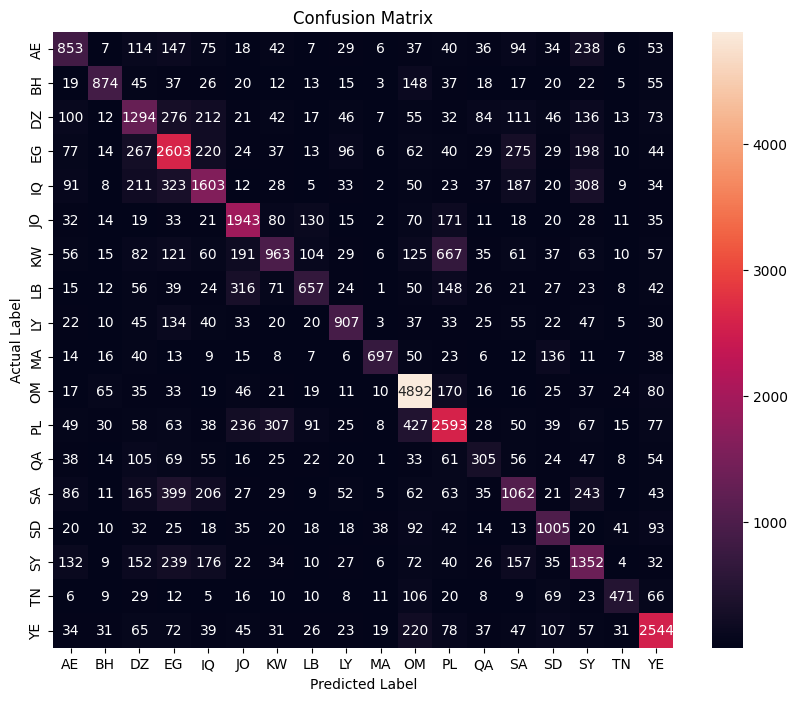

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

test_labels = np.array(test_dataset["labels"])

conf_matrix  = confusion_matrix(test_labels, logits)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
class_names = ["AE", "BH", "DZ", "EG", "IQ", "JO", "KW", "LB", "LY", "MA", "OM", "PL", "QA", "SA", "SD", "SY", "TN", "YE"]
sns.heatmap(conf_matrix , annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(test_labels, logits, target_names=class_names, digits=4)
print("Classification Report:\n\n\n", report)

Classification Report:


               precision    recall  f1-score   support

          AE     0.5135    0.4646    0.4878      1836
          BH     0.7528    0.6306    0.6863      1386
          DZ     0.4598    0.5021    0.4801      2577
          EG     0.5612    0.6437    0.5996      4044
          IQ     0.5632    0.5372    0.5499      2984
          JO     0.6400    0.7324    0.6831      2653
          KW     0.5410    0.3591    0.4316      2682
          LB     0.5577    0.4212    0.4799      1560
          LY     0.6553    0.6095    0.6316      1488
          MA     0.8387    0.6291    0.7189      1108
          OM     0.7426    0.8837    0.8070      5536
          PL     0.6057    0.6172    0.6114      4201
          QA     0.3930    0.3200    0.3528       953
          SA     0.4697    0.4206    0.4438      2525
          SD     0.5857    0.6467    0.6147      1554
          SY     0.4630    0.5354    0.4966      2525
          TN     0.6876    0.5304    0.5989       888
 

**Correct Labels** **✅**

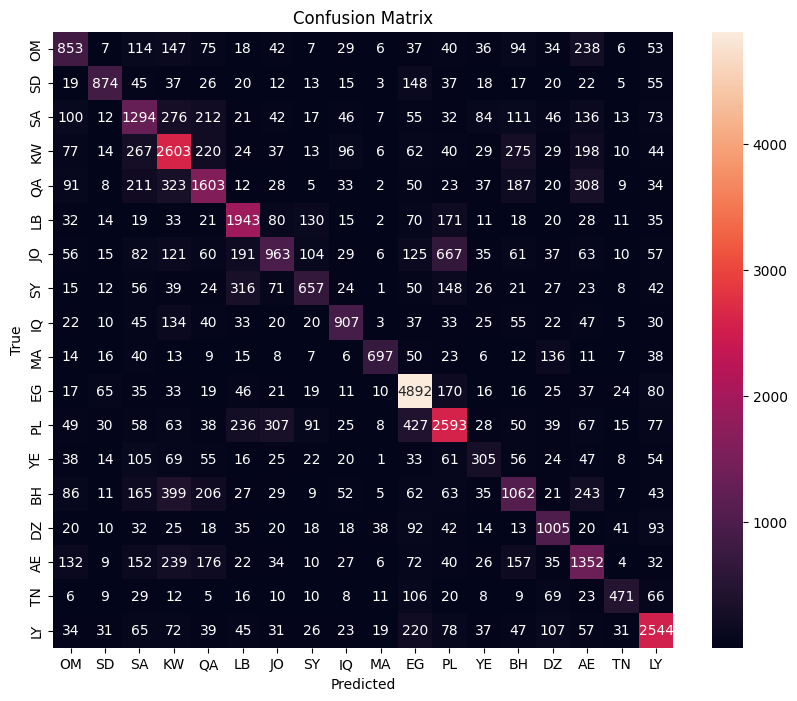

In [ ]:
import numpy as np

# Confusion matrix (18x18) with your specified label order
confusion_matrix = np.array([
    [853, 7, 114, 147, 75, 18, 42, 7, 29, 6, 37, 40, 36, 94, 34, 238, 6, 53],
    [19, 874, 45, 37, 26, 20, 12, 13, 15, 3, 148, 37, 18, 17, 20, 22, 5, 55],
    [100, 12, 1294, 276, 212, 21, 42, 17, 46, 7, 55, 32, 84, 111, 46, 136, 13, 73],
    [77, 14, 267, 2603, 220, 24, 37, 13, 96, 6, 62, 40, 29, 275, 29, 198, 10, 44],
    [91, 8, 211, 323, 1603, 12, 28, 5, 33, 2, 50, 23, 37, 187, 20, 308, 9, 34],
    [32, 14, 19, 33, 21, 1943, 80, 130, 15, 2, 70, 171, 11, 18, 20, 28, 11, 35],
    [56, 15, 82, 121, 60, 191, 963, 104, 29, 6, 125, 667, 35, 61, 37, 63, 10, 57],
    [15, 12, 56, 39, 24, 316, 71, 657, 24, 1, 50, 148, 26, 21, 27, 23, 8, 42],
    [22, 10, 45, 134, 40, 33, 20, 20, 907, 3, 37, 33, 25, 55, 22, 47, 5, 30],
    [14, 16, 40, 13, 9, 15, 8, 7, 6, 697, 50, 23, 6, 12, 136, 11, 7, 38],
    [17, 65, 35, 33, 19, 46, 21, 19, 11, 10, 4892, 170, 16, 16, 25, 37, 24, 80],
    [49, 30, 58, 63, 38, 236, 307, 91, 25, 8, 427, 2593, 28, 50, 39, 67, 15, 77],
    [38, 14, 105, 69, 55, 16, 25, 22, 20, 1, 33, 61, 305, 56, 24, 47, 8, 54],
    [86, 11, 165, 399, 206, 27, 29, 9, 52, 5, 62, 63, 35, 1062, 21, 243, 7, 43],
    [20, 10, 32, 25, 18, 35, 20, 18, 18, 38, 92, 42, 14, 13, 1005, 20, 41, 93],
    [132, 9, 152, 239, 176, 22, 34, 10, 27, 6, 72, 40, 26, 157, 35, 1352, 4, 32],
    [6, 9, 29, 12, 5, 16, 10, 10, 8, 11, 106, 20, 8, 9, 69, 23, 471, 66],
    [34, 31, 65, 72, 39, 45, 31, 26, 23, 19, 220, 78, 37, 47, 107, 57, 31, 2544]
])

# Label list for reference
labels = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()